## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


## Dataset Loading

In [ ]:
df = pd.read_csv(r'D:\Project Phase II\Dataset\completedataset.csv',encoding='cp1252')
df

C:\Users\sathi\AppData\Local\Temp\ipykernel_14384\870708999.py:1: DtypeWarning: Columns (1,3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\Project Phase II\Dataset\completedataset.csv',encoding='cp1252')


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2,5,1,1,2,NaN,0
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,,3,5,2,4,1,1,4,NaN,0
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,,3,5,1,1,1,1,3,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
4,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [4]:
df.head(1)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2,5,1,1,2,NaN,0


## Normie EDA

is_sm_ips_ports field denotes if the ip and the port of source and destination is the same

In [3]:
# Finding count of df[is_sm_ips_ports] = 1
df[df['is_sm_ips_ports']==1 ].count()

srcip               4195
sport               4195
dstip               4195
dsport              4195
proto               4195
state               4195
dur                 4195
sbytes              4195
dbytes              4195
sttl                4195
dttl                4195
sloss               4195
dloss               4195
service             4195
Sload               4195
Dload               4195
Spkts               4195
Dpkts               4195
swin                4195
dwin                4195
stcpb               4195
dtcpb               4195
smeansz             4195
dmeansz             4195
trans_depth         4195
res_bdy_len         4195
Sjit                4195
Djit                4195
Stime               4195
Ltime               4195
Sintpkt             4195
Dintpkt             4195
tcprtt              4195
synack              4195
ackdat              4195
is_sm_ips_ports     4195
ct_state_ttl        4195
ct_flw_http_mthd    2805
is_ftp_login        2805
ct_ftp_cmd          4195


In [4]:


# Finding count of df[is_sm_ips_ports] = 1 and df[Label] = 1
df[(df['is_sm_ips_ports']==1) & (df['Label']==1)].count()

srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_spo

There is no attack when source and destination ip and port is same. So it is safe to drop these records and also to completely drop this field

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

Service - High level protocol like HTTP, FTP

Proto - Low level protocol like HTTP uses TCP, FTP uses TCP (the underlying protocol)

In [19]:
#List of unique proto values
df.proto.unique()

array(['tcp', 'udp', 'icmp', 'arp', 'ospf', 'udt', 'sctp', 'igmp', 'gre',
       'sep', 'swipe', 'mobile', 'sun-nd', 'pim', 'rtp', 'ip', 'ggp',
       'ipnip', 'st2', 'cbt', 'argus', 'bbn-rcc', 'chaos', 'egp', 'emcon',
       'igp', 'nvp', 'pup', 'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1',
       'trunk-2', 'xns-idp', 'irtp', 'leaf-1', 'leaf-2', 'rdp', 'iso-tp4',
       'netblt', 'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp',
       'idpr-cmtp', 'tp++', 'il', 'ipv6', 'ipv6-route', 'sdrp',
       'ipv6-frag', 'idrp', 'rsvp', 'bna', 'mhrp', 'i-nlsp', 'narp',
       'tlsp', 'skip', 'ipv6-no', 'ipv6-opts', 'any', 'cftp', 'sat-expak',
       'kryptolan', 'ippc', 'rvd', 'sat-mon', 'cpnx', 'ipcv', 'visa',
       'cphb', 'wsn', 'br-sat-mon', 'pvp', 'wb-mon', 'iso-ip', 'wb-expak',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'larp', 'sprite-rpc', 'ax.25', 'ipip', 'mtp',
       'aes-sp3-d', 'etherip', 'micp', 'encap', 'pri-enc', 'gmtp', 'ifmp

In [20]:
len(df.proto.unique())

135

In [21]:
df.service.unique()

array(['-', 'ftp-data', 'dns', 'smtp', 'http', 'ftp', 'ssh', 'pop3',
       'dhcp', 'snmp', 'ssl', 'irc', 'radius'], dtype=object)

In [22]:
len(df.service.unique())

13

## Create Complete Source Address and Destination Address

Field src = srcIP : Port

In [6]:
df['src'] = df['srcip']+':'+df['sport'].astype(str)

In [11]:
df['src']

0             59.166.0.1:18247
1             59.166.0.3:54771
2             59.166.0.8:13289
3          149.171.126.18:1043
4          149.171.126.18:1043
                  ...         
2540042       59.166.0.5:33094
2540043       59.166.0.7:20848
2540044       59.166.0.3:21511
2540045       59.166.0.9:35433
2540046     175.45.176.0:17293
Name: src, Length: 2540047, dtype: object

Number of unique sourceIP:port

In [10]:
len(df['src'].unique())

692920

Number of unique sourceIP

In [12]:
len(df['srcip'].unique())

43

Number of unique source Ports

In [22]:
len(df['sport'].unique())

107594

Field dst = dstIP : dsport

In [15]:
df['dst'] = df['dstip']+':'+df['dsport'].astype(str)

Number of unique destinationIP:port

In [16]:
len(df['dst'].unique())

423204

Number of unique destinationIP

In [17]:
len(df['dstip'].unique())

47

Number of unique destination Ports

In [20]:
len(df['dsport'].unique())

128286

Number of sourceIPs that are destinationIPs and viceversa

In [18]:
#Finding number of common src and dst ip addresses
len(set(df['srcip'].unique()).intersection(set(df['dstip'].unique())))


41

Number of srcIP:port that are dstIP:port and vice versa

In [19]:
len(set(df['src'].unique()).intersection(set(df['dst'].unique())))

3837

In [24]:
df.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,...,1.191902e+06,1.110168e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,3.695645e+07,2.450861e+06,3.328884e+01,...,2.345856e-01,3.969940e-02,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,1.264870e-01
std,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,1.186043e+08,4.224863e+06,7.628388e+01,...,7.940924e-01,1.996589e-01,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,3.323975e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353963e+05,1.191594e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145545e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925974e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


Null Value Fields

In [32]:
x = df.isnull().sum()
for i in x.keys():
    if x[i]>0:
        print(i, x[i])

ct_flw_http_mthd 1348145
is_ftp_login 1429879
attack_cat 2218764


Correlation between variables

In [34]:
correlation_matrix = df.corr()
print(correlation_matrix)

                       dur    sbytes    dbytes      sttl      dttl     sloss  \
dur               1.000000  0.033269  0.086971 -0.003653  0.010708  0.041493   
sbytes            0.033269  1.000000  0.047027 -0.008925  0.066423  0.953492   
dbytes            0.086971  0.047027  1.000000 -0.094181  0.009123  0.115536   
sttl             -0.003653 -0.008925 -0.094181  1.000000  0.113982 -0.069436   
dttl              0.010708  0.066423  0.009123  0.113982  1.000000  0.076686   
sloss             0.041493  0.953492  0.115536 -0.069436  0.076686  1.000000   
dloss             0.087713  0.051183  0.991342 -0.118656  0.013923  0.153328   
Sload            -0.014715 -0.020990 -0.069986  0.280077 -0.219185 -0.068925   
Dload            -0.022502 -0.006786  0.083811 -0.246821 -0.022067  0.046725   
Spkts             0.088082  0.602840  0.727075 -0.150796  0.046316  0.725512   
Dpkts             0.089368  0.109749  0.970808 -0.141729  0.019952  0.237363   
swin              0.011126  0.059779  0.

## Adjust the timestamp values to user readable format

In [35]:
df['Stime']

0          1424231129
1          1424231129
2          1424231129
3          1424231129
4          1424231129
              ...    
2540042    1424262068
2540043    1424262068
2540044    1424262062
2540045    1424262067
2540046    1424262068
Name: Stime, Length: 2540047, dtype: int64

Convert the Unix TimeStamp into interpretable timestamps in Stime and Ltime

In [3]:
df['StimeTimeStamp'] = pd.to_datetime(df['Stime'], unit='s')
df['StimeTimeStamp']

0         2015-02-18 03:45:29
1         2015-02-18 03:45:29
2         2015-02-18 03:45:29
3         2015-02-18 03:45:29
4         2015-02-18 03:45:29
                  ...        
2540042   2015-02-18 12:21:08
2540043   2015-02-18 12:21:08
2540044   2015-02-18 12:21:02
2540045   2015-02-18 12:21:07
2540046   2015-02-18 12:21:08
Name: StimeTimeStamp, Length: 2540047, dtype: datetime64[ns]

In [4]:
df['LtimeTimeStamp'] = pd.to_datetime(df['Ltime'], unit='s')
df['LtimeTimeStamp']

0         2015-02-18 03:45:29
1         2015-02-18 03:45:29
2         2015-02-18 03:45:29
3         2015-02-18 03:45:29
4         2015-02-18 03:45:29
                  ...        
2540042   2015-02-18 12:21:09
2540043   2015-02-18 12:21:09
2540044   2015-02-18 12:21:09
2540045   2015-02-18 12:21:09
2540046   2015-02-18 12:21:09
Name: LtimeTimeStamp, Length: 2540047, dtype: datetime64[ns]

In [7]:
len(df['StimeTimeStamp'].unique())

85348

In [8]:
len(df['LtimeTimeStamp'].unique())

85361

In [9]:
# Number of years in the dataset
len(df['StimeTimeStamp'].dt.year.unique())

1

In [11]:
#number of months in the dataset    
len(df['StimeTimeStamp'].dt.month.unique())

2

In [12]:
#number of days in the dataset
len(df['StimeTimeStamp'].dt.day.unique())

3

## Graph Construction

Data Cleaning

In [ ]:
#Cleaning df by removing rows with is_sm_ips_ports = 1
df = df[df['is_sm_ips_ports']==0]
#Dropping is_sm_ips_ports column
df.drop(['is_sm_ips_ports'], axis=1, inplace=True)
#Dropping attack_cat column
df.drop(['attack_cat'], axis=1, inplace=True)

Sample Graph

In [5]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Create a directed graph
sampleG = nx.MultiDiGraph()

# Iterate through the dataset and add nodes and edges with attributes
dfsample = df.sample(1000)
for _, row in dfsample.iterrows():
    source = row['srcip'] + str(row['sport'])
    target = row['dstip'] + str(row['dsport'])
    edge_attributes = {k: row[k] for k in df.columns if k not in ['srcip', 'dstip', 'sport', 'dsport']}
    
    # Add nodes and edges with attributes
    sampleG.add_node(source)
    sampleG.add_node(target)
    sampleG.add_edge(source, target, **edge_attributes)


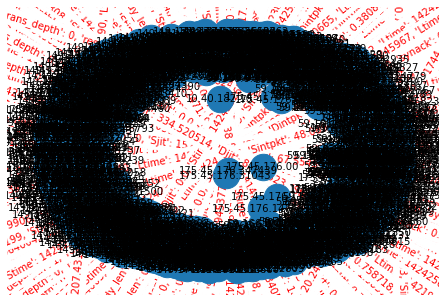

In [8]:
pos = nx.spring_layout(sampleG)
nx.draw(sampleG, pos, with_labels=True, node_size=700, font_size=10, font_color='black')
edge_labels = {(source, target): attributes for source, target, attributes in sampleG.edges(data=True)}
nx.draw_networkx_edge_labels(sampleG, pos, edge_labels=edge_labels, font_color='red')

plt.show()